# 📌 Introduction

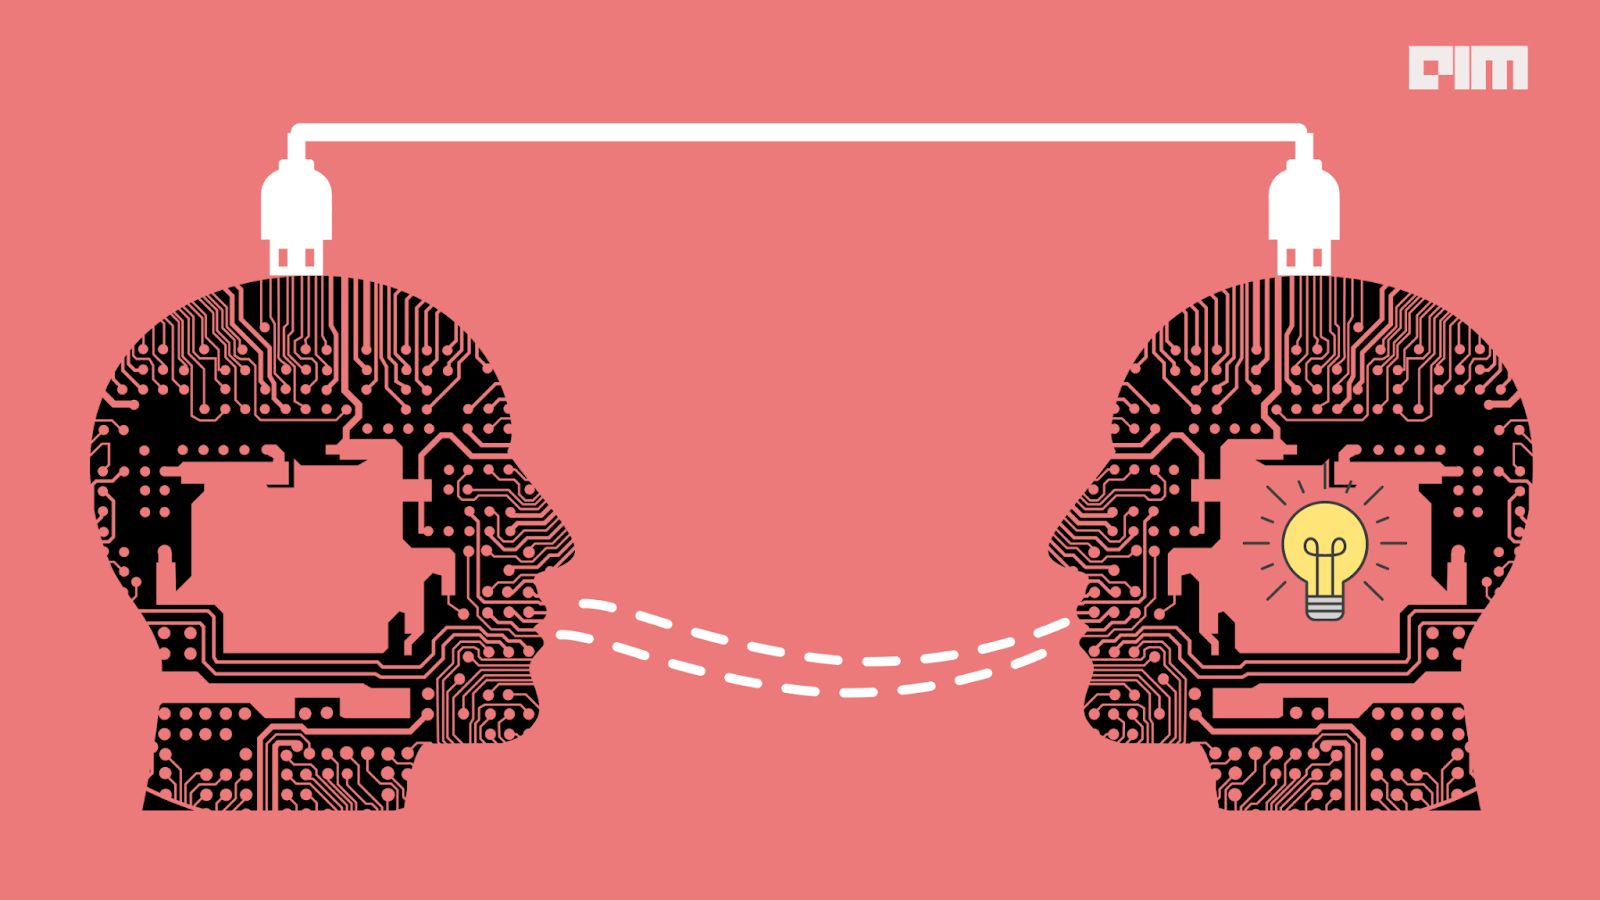

*  **In this notebook, we will classify traffic signs using the transfer learning method with ResNet-50.**

**Content:**

<font color= '#ff6574'> 
1. Transfer Learning <br>
2. ResNet-50 <br>  
3. Import Libraries <br>
4. Load Data <br>
5. Preprocess <br>
6. Visualization <br>
7. Using weights of ResNet-50 <br>
8. Modeling <br>

# Transfer Learning

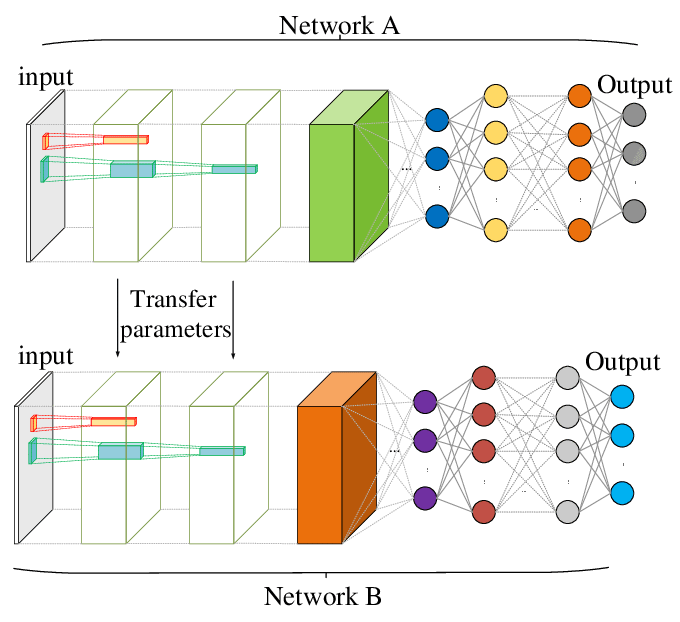

Transfer or inductive learning is a supervised learning technique that reuses parts of a previously trained model on a new network tasked for a different but similar problem.

Using a pre-trained model significantly reduces the time required for feature engineering and training. The first step is to select a source model, ideally one with a large dataset to train with. Many research institutions release these models and datasets as open-sourced projects, so it’s not necessary to create your own.

The next step is to decide which layers to reuse in your own network. The goal is create a framework that is at least better than a naive model, so you can be assured some new feature learning takes place.  Typically deeper layers are reused as these tend to be more general whereas the top layers tend to more finely tuned to a particular problem.  
Finally, the new model is trained on the new data set as usual.   The advantage is that the model tends to convergence much faster and thus less data and compute time is required.

# ResNet-50

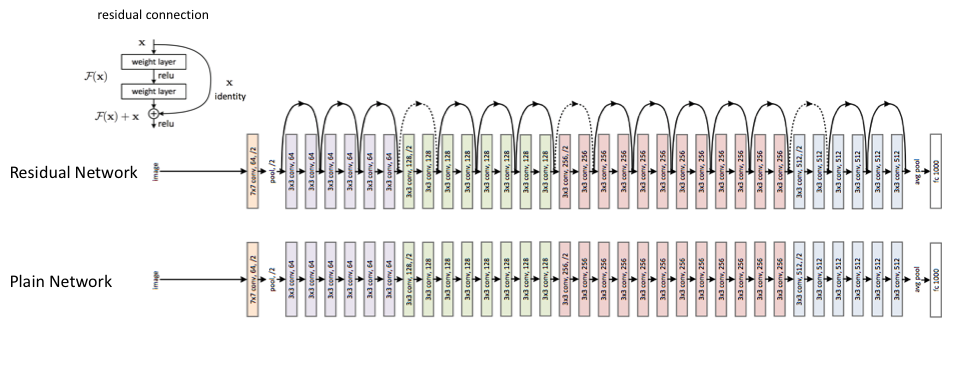

ResNet-50 (Residual Networks) is a deep neural network that is used as a backbone for many computer vision applications like object detection, image segmentation, etc. ResNet was created by the four researchers Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun and it was the winner of the ImageNet challenge in 2015 with an error rate of 3.57%. It also addressed the problem of vanishing gradient that was common in very deep neural networks like itself.


In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import Libraries

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load Data

In [ ]:
data = pd.read_pickle('/kaggle/input/traffic-signs-preprocessed/data0.pickle')

In [ ]:
print('keys:', data.keys())

In [ ]:
x_train = data['x_train']
x_validation = data['x_validation']

# Preprocess 

In [ ]:
numberOfClass = 43

def preprocess_data(x,y):
    x_data = preprocess_input(x)
    y_data = to_categorical(y, numberOfClass)
    return x_data, y_data

In [ ]:
x_train.shape

In [ ]:
x_train = x_train.swapaxes(1,2)
x_train = x_train.swapaxes(2,3)

In [ ]:
x_train.shape

In [ ]:
x_validation = x_validation.swapaxes(1,2)
x_validation = x_validation.swapaxes(2,3)

# Visualization

In [ ]:
plt.figure(figsize=(20,15))
for i in range(428,440):
    plt.subplot(4,4,(i%12)+1)
    plt.imshow(x_train[i].astype(np.uint8))
    plt.tight_layout()

In [ ]:
x_train, y_train = preprocess_data(x_train, data['y_train'])
x_validation, y_validation = preprocess_data(x_validation, data['y_validation'])

# Using weights of ResNet-50

In [ ]:
resnet_model = ResNet50(include_top = False, weights = "imagenet", input_shape = (224,224,3))

In [ ]:
print(resnet_model.summary())

In [ ]:
# Freeze resnet layers
for layer in resnet_model.layers:
    layer.trainable = False

# Modeling

In [ ]:
img_size = (224,224)

model = Sequential() 
model.add(Lambda(lambda image: tf.image.resize(image,img_size)))
model.add(resnet_model)

# Fully connected layer
model.add(Flatten()) 
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass, activation='softmax'))

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [ ]:
hist = model.fit(x_train, y_train, validation_data =(x_validation,y_validation), epochs = 10, batch_size = 1000)

In [ ]:
model.summary()

### ⭐️ If you like it, please upvote!